<a href="https://colab.research.google.com/github/Thanakorn2717/Data_Analytics_Fitbit_Tracker_Data/blob/main/Fitbit_Tracker_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'fitbit-data-transformed:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5539155%2F9167117%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250423%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250423T142225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbbd0742fb62472f231160d6d03e4a19ec900da2c3b4e88d56b5785c53b4ab19b7feda9eafb5c193a4f19a778af6898cd268a3b80e3c472f4b58c1254084f5e4945df7abcc6b24db4eea47b5a6390cb65fcfc5006ecaea7a02c6449cc2d04c62c560e2bb83e4d333f7e9dc540fc3d9363f087f14abce9aeeab370036e8367b5cb5491beb781acc4e540b9eeab8d4db6a891b3b181f60500724cad39eff6217d7f95547641dd26411a053d1963bd461b383d4af102855a6b7b2b1d717c0dac6c59fddb2fce3059a6154f75c3d33db1842ed0586cc83d0014b288a62544d112294a9e77a50fbde1200a0462aef7daf7286225e915aba5f0035989681534f86efe55'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: fitbit-data-transformed"
[1] "Downloaded and uncompressed: fitbit-data-transformed"
[1] "Data source import complete"


## Scenario

You are a junior data analyst working on the marketing analyst team at **Bellabeat**, a high-tech manufacturer of health-focused products for women. Urška Sršen, cofounder and Chief Creative officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat's executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Business tasks:

- Understand consumer behavior from Smart device tracker usage.
- Create business strategy from insights of understanding consumer behavior.

## Key questions:

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat's customers?
- How could these trends help influence Bellabeat's marketing strategy?

## Prepare data:

Sršen encourages you to use public data that explores smart device users’ daily habits. She points you to a specific data set:
- [**FitBit Fitness Tracker Data**](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty Fit bit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

# Reference of data source
As the scenario, I will use dataset from [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/)


# Loading all packages

In [ ]:
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Loading dataset

In [ ]:
daily_activity = read_csv("/kaggle/input/fitbit-data-transformed/daily_activity_merged.csv")
weight_bmi_day = read_csv("/kaggle/input/fitbit-data-transformed/weight_bmi_day_merged.csv")
sleep_day = read_csv("/kaggle/input/fitbit-data-transformed/sleep_day_eff.csv")

Rows: 1299 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): DayofWeek
dbl  (15): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesD...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 98 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DayofWeek
dbl  (3): Id, avg_weightKg, avg_BMI
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 346 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DayofWeek
dbl  (5): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed, sleep_e...
date (1): date

ℹ Use `spec()` to retrieve the ful

# Merging data

In [ ]:
# join daily_activity and sleep_day
active_vs_sleep <- inner_join(daily_activity, sleep_day, by = c("Id", "date", "DayofWeek"))

Warning message in inner_join(daily_activity, sleep_day, by = c("Id", "date", "DayofWeek")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 375 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


# 1. Summary statistics

## Daily Activity
Participants = 35

In [ ]:
daily_activity %>%
    select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, TotalMinutes, Calories) %>%
    summary()

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   :  0.00    Min.   :  0.0       Min.   :  0.0       
 1st Qu.: 4056   1st Qu.:  0.00    1st Qu.:  0.0       1st Qu.:135.0       
 Median : 7443   Median :  4.00    Median :  7.0       Median :204.0       
 Mean   : 7828   Mean   : 21.14    Mean   : 14.4       Mean   :199.2       
 3rd Qu.:10818   3rd Qu.: 32.00    3rd Qu.: 20.0       3rd Qu.:268.0       
 Max.   :36019   Max.   :210.00    Max.   :660.0       Max.   :720.0       
 SedentaryMinutes  TotalMinutes     Calories   
 Min.   :  13     Min.   :  26   Min.   :   0  
 1st Qu.: 721     1st Qu.: 983   1st Qu.:1821  
 Median :1028     Median :1367   Median :2180  
 Mean   : 965     Mean   :1200   Mean   :2313  
 3rd Qu.:1201     3rd Qu.:1440   3rd Qu.:2806  
 Max.   :1440     Max.   :1440   Max.   :4900  

## Daily Sleep
Participants = 21

In [ ]:
sleep_day %>%
    select(TotalMinutesAsleep, TotalTimeInBed, sleep_efficiency) %>%
    summary()

 TotalMinutesAsleep TotalTimeInBed  sleep_efficiency
 Min.   :213.0      Min.   :248.0   Min.   :53.50   
 1st Qu.:379.2      1st Qu.:415.0   1st Qu.:91.30   
 Median :438.5      Median :468.5   Median :94.40   
 Mean   :432.7      Mean   :472.8   Mean   :91.74   
 3rd Qu.:489.8      3rd Qu.:526.8   3rd Qu.:96.20   
 Max.   :796.0      Max.   :961.0   Max.   :99.80   

## Daily Weight and BMI
Participants = 13

In [ ]:
weight_bmi_day %>%
    select(avg_weightKg, avg_BMI) %>%
    summary()

  avg_weightKg       avg_BMI     
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.50   1st Qu.:24.00  
 Median : 62.50   Median :24.39  
 Mean   : 72.47   Mean   :25.37  
 3rd Qu.: 85.25   3rd Qu.:25.59  
 Max.   :133.50   Max.   :47.54  

## Interesting things

- On the average, users spend 21.14 Minutes on **Very active** activity, 14.4 Minutes on **Fairly active**, and 965 Minutes on **Sedentary** activity.
- Users spend their time **7 hours/day for sleep**. Sleep efficiency is also good from **91.74%** in average.
- On this analysis, the data is collected at Fitbit Fitness center.
An **average BMI** of users is **25.37%**.
This quite make sense on a good health sign for people who like exercise.
- However, the participants in these datasets total might be too few, especially on **Daily weight and BMI**. We need more data to see the actual trends for more larger population.

# 2. Visualizations

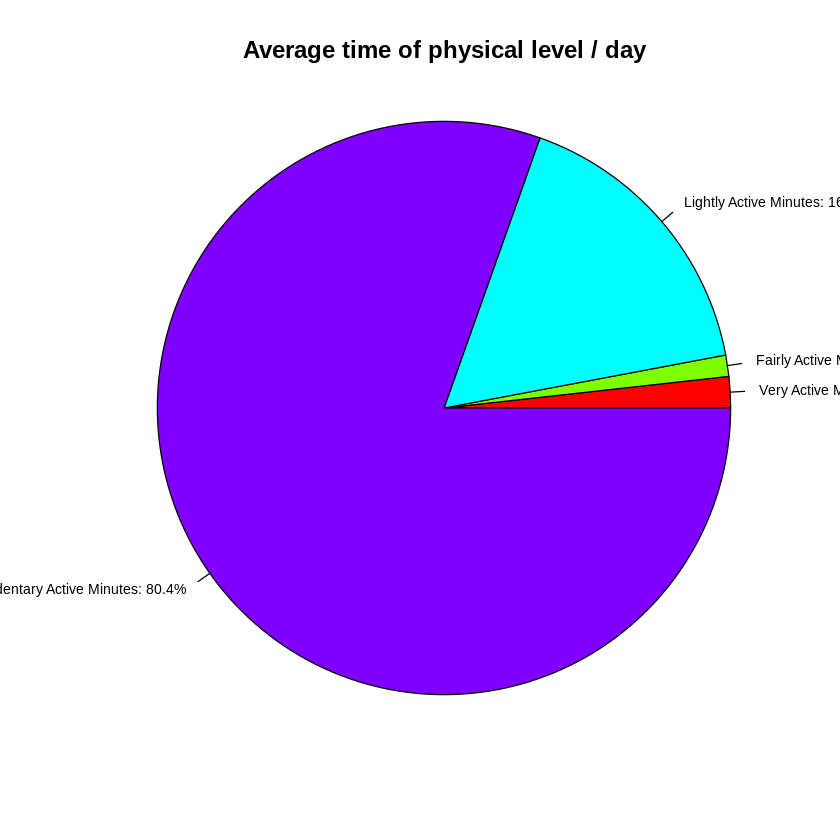

In [ ]:
physical_level_avg <- data.frame(Category = c("Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Active Minutes"),
                                 Value = c(mean(daily_activity$VeryActiveMinutes),
                                           mean(daily_activity$FairlyActiveMinutes),
                                           mean(daily_activity$LightlyActiveMinutes),
                                           mean(daily_activity$SedentaryMinutes)))

values <- physical_level_avg$Value
labels <- physical_level_avg$Category

percentages <- round(values / sum(values) * 100, 1)
labels_with_percentages <- paste(labels, ": ", percentages, "%", sep = "")

# Create the pie chart
pie(values,
    labels = labels_with_percentages,
    main = "Average time of physical level / day",
    col = rainbow(length(labels)),  # Ensure colors are applied correctly
    cex = 0.7, # Adjust text size with `cex`
    radius = 1)  # Adjust pie size

Looking at the pie chart, users use 1.8% of a day on Very active activity like intense exercising(e.g. jogging, cardio) and 1.2% of a day on Fairly active activity like moderate exercising(e.g. bicycling, Skating) in average. The average minutes spending for these activity is around 35 Minutes / Day. **This means the majority of them are quite active.**

## Correlations

## 1. Sedentary Minutes & Total Minutes A sleep

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


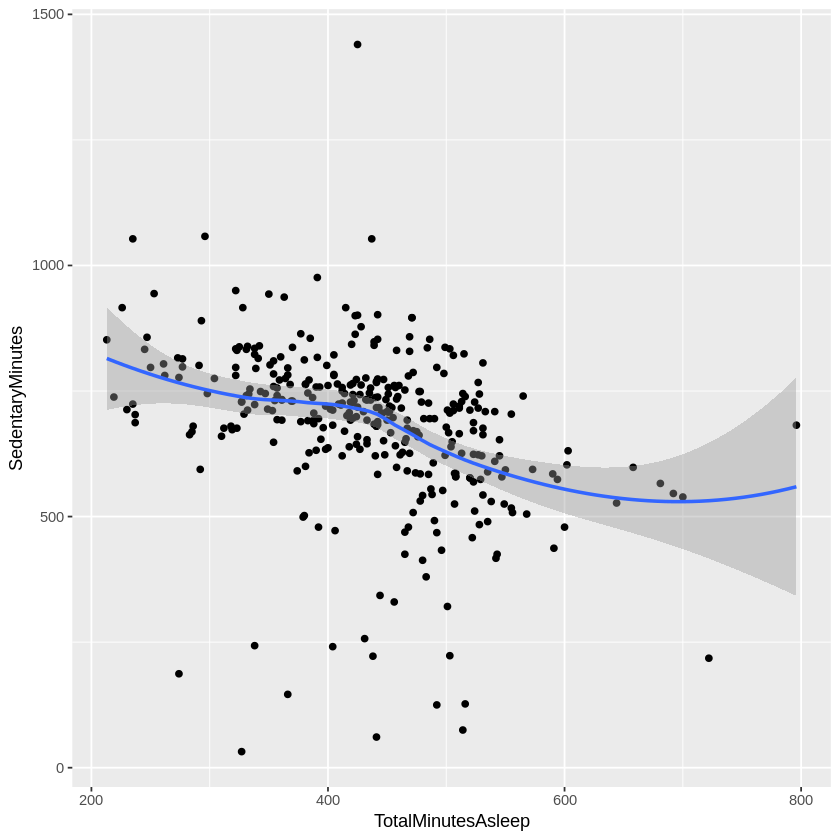

In [ ]:
ggplot(active_vs_sleep,aes(y=SedentaryMinutes, x=TotalMinutesAsleep)) + geom_point() + geom_smooth()

You can see the negative correlation between **Sedentary Minutes** and **Total Minutes A sleep**. To improve users sleep time, company might consider adding a feature for notification to increase active activity time.

## 2. Total Minutes A sleep & Sleep efficiency

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


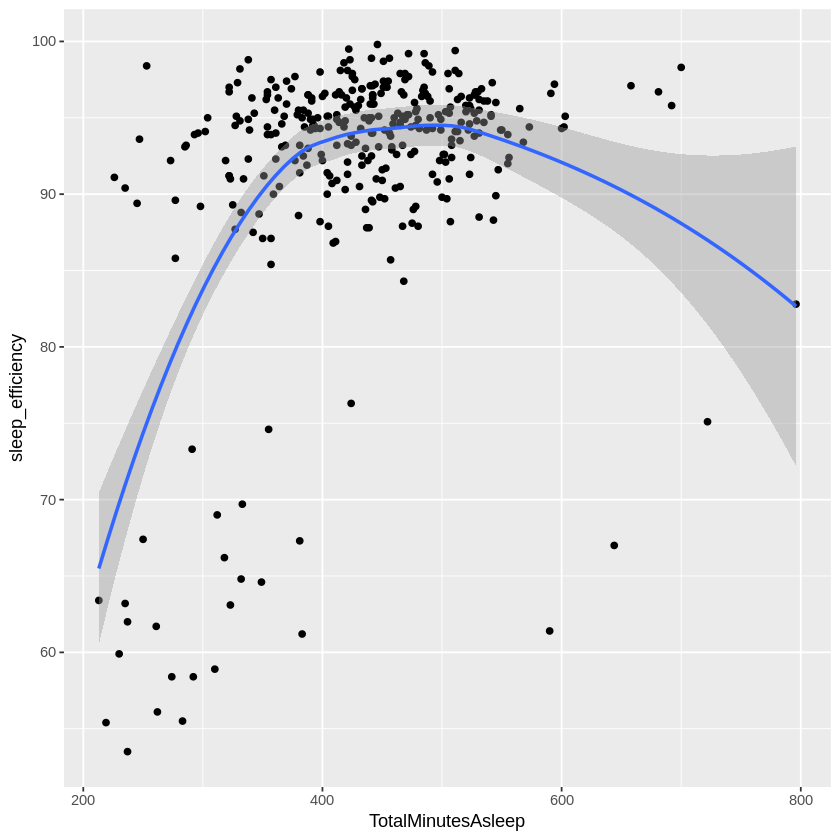

In [ ]:
ggplot(sleep_day,aes(x=TotalMinutesAsleep, y=sleep_efficiency)) + geom_point() + geom_smooth()

However, let's check correlations between **Total Minutes A sleep** & **Sleep efficiency**. As you can see the above result, there is no correlation between these 2 factor. This means "the more total sleep time, the more sleep efficiency" is not quite right. Therefore, company might consider adding a feature for improving the sleep efficiency by notifying users to go to sleep after they use their time in bed for a while.

<u>Note</u>  : **Sleep efficiency** is the percentage of time spent asleep while in bed. It is calculated by

(total time spent a sleep (in minutes) / total amount of time in bed (in minutes)) * 100

**A good sleep efficiency is 85% or higher.**

## 3. Total steps & Calories burned

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


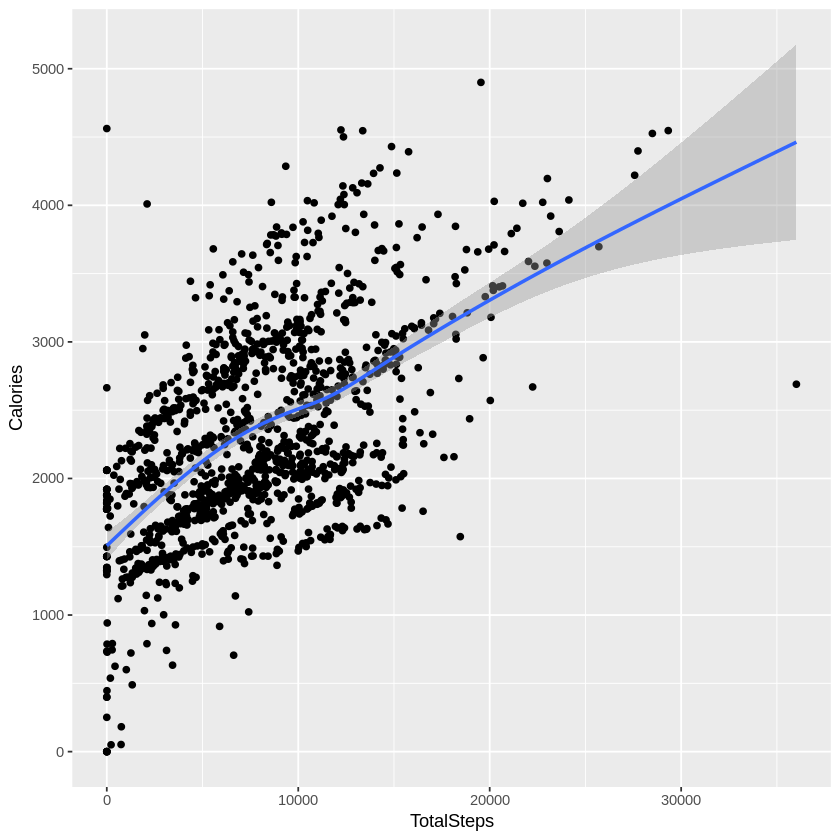

In [ ]:
ggplot(daily_activity,aes(x=TotalSteps, y=Calories)) + geom_point() + geom_smooth()

This result show positive correlation between **Total steps** & **Calories burned**. The more total steps a day, the more calories burned. Company might consider adding a feature for calories burned goal and notify total steps left to reach that goal in a day.

# Conclusion and recommendation


<img src="https://images.pexels.com/photos/221247/pexels-photo-221247.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="Drawing" style="width: 500px;"/>
Image from <a href="https://www.pexels.com/">Pexels</a> by Pixabay

## Based on analysis result:

1.  As an average of physical level time spending / day, the result shows that users spend their time on **Very active** and **Fairly active** activity 3% of a day in total. It’s around **35 Minutes / Day** for light and intense activity. This means the majority of them are quite active and love intense activity like exercising. **With these trends, The company might consider adding a feature for exercise teaching/guiding to support current customers for their exercise activity and attract new customers who love daily exercise and want to improve their exercising habits.**


2. The correlation between **Sedentary Minutes** and **Total Minutes A sleep** is negative. To improve users's sleep time, **company might consider adding a feature for notification to increase active activity time.**

3. There is no correlation between **Total Minutes A sleep** & **Sleep efficiency**. This means "the more total sleep time, the more sleep efficiency" is not quite right. Therefore, **company might consider adding a feature for improving sleep efficiency by notifying users to go to sleep after they use their time in bed for a while.**

4. The correlation between **Total steps** & **Calories burned** is positive.
The more total steps a day, the more calories burned. **Company might consider adding a feature for calories burned goal and notify total steps left to reach that goal in a day.**


# Limitation

The datasets of this analysis was collected from a fitness center and participants is only 10-35 persons / one dataset. We need more data by collecting on a different place and more participants to see an actual trends of a larger population.

## This is my first analysis case in the data analyst path. I would really appreciate it if you could give me some feedback. Thank you!